### Import Required Libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)
plt.style.use('seaborn-v0_8-whitegrid')

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


### Load Dataset

In [9]:
# Load dataset
df = pd.read_csv('Depression Professional Dataset.csv')
print(f"Dataset loaded: {df.shape}")

# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"\nCategorical columns: {categorical_cols}")
print(f"Numerical columns: {numerical_cols}")

Dataset loaded: (2054, 11)

Categorical columns: ['Gender', 'Sleep Duration', 'Dietary Habits', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness', 'Depression']
Numerical columns: ['Age', 'Work Pressure', 'Job Satisfaction', 'Work Hours', 'Financial Stress']


### Data Preparation for Clustering

In [10]:
# Create a copy for clustering
df_clust = df.copy()

# Encode categorical variables
le_dict = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_clust[col] = le.fit_transform(df_clust[col])
    le_dict[col] = le

# Prepare features (include all attributes)
X_clust = df_clust.copy()

# Scale features
scaler = StandardScaler()
X_clust_scaled = scaler.fit_transform(X_clust)

print(f"Clustering data shape: {X_clust_scaled.shape}")
print(f"Features used: {X_clust.columns.tolist()}")

Clustering data shape: (2054, 11)
Features used: ['Gender', 'Age', 'Work Pressure', 'Job Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Have you ever had suicidal thoughts ?', 'Work Hours', 'Financial Stress', 'Family History of Mental Illness', 'Depression']


### Determine Optimal Number of Clusters

DETERMINING OPTIMAL K FOR K-MEANS (ELBOW METHOD)
k=2: Inertia=19819.58, Silhouette=0.2468
k=3: Inertia=17949.54, Silhouette=0.1226k=3: Inertia=17949.54, Silhouette=0.1226
k=4: Inertia=16911.35, Silhouette=0.1110

k=4: Inertia=16911.35, Silhouette=0.1110
k=5: Inertia=16083.28, Silhouette=0.1259
k=6: Inertia=15532.86, Silhouette=0.1127
k=5: Inertia=16083.28, Silhouette=0.1259
k=6: Inertia=15532.86, Silhouette=0.1127
k=7: Inertia=15125.79, Silhouette=0.1125
k=8: Inertia=14770.98, Silhouette=0.1145
k=7: Inertia=15125.79, Silhouette=0.1125
k=8: Inertia=14770.98, Silhouette=0.1145
k=9: Inertia=14402.72, Silhouette=0.1161
k=9: Inertia=14402.72, Silhouette=0.1161
k=10: Inertia=14101.85, Silhouette=0.1134
k=10: Inertia=14101.85, Silhouette=0.1134
✓ Saved: output_files/Task5_Elbow_Silhouette.png
✓ Saved: output_files/Task5_Elbow_Silhouette.png


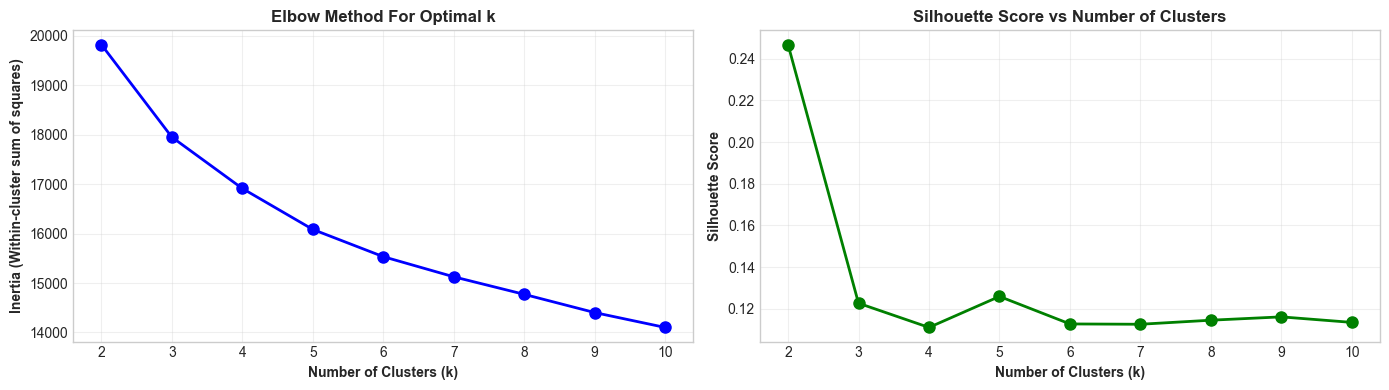


Selected optimal k: 3


In [11]:
print("="*80)
print("DETERMINING OPTIMAL K FOR K-MEANS (ELBOW METHOD)")
print("="*80)

inertias = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_clust_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_clust_scaled, kmeans.labels_))
    print(f"k={k}: Inertia={kmeans.inertia_:.2f}, Silhouette={silhouette_scores[-1]:.4f}")

# Plot elbow curve and silhouette scores
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))

ax1.plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('Number of Clusters (k)', fontweight='bold')
ax1.set_ylabel('Inertia (Within-cluster sum of squares)', fontweight='bold')
ax1.set_title('Elbow Method For Optimal k', fontweight='bold', fontsize=12)
ax1.grid(True, alpha=0.3)

ax2.plot(K_range, silhouette_scores, 'go-', linewidth=2, markersize=8)
ax2.set_xlabel('Number of Clusters (k)', fontweight='bold')
ax2.set_ylabel('Silhouette Score', fontweight='bold')
ax2.set_title('Silhouette Score vs Number of Clusters', fontweight='bold', fontsize=12)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('output_files/Task5_Elbow_Silhouette.png', dpi=300, bbox_inches='tight')
print("✓ Saved: output_files/Task5_Elbow_Silhouette.png")
plt.show()

# Select optimal k
optimal_k = 3
print(f"\nSelected optimal k: {optimal_k}")

## Algorithm 1: K-Means Clustering

In [12]:
print("="*80)
print("ALGORITHM 1: K-MEANS CLUSTERING")
print("="*80)

# Apply K-Means
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_clust_scaled)

print(f"\nNumber of clusters: {optimal_k}")
print(f"\nCluster Distribution:")
unique, counts = np.unique(kmeans_labels, return_counts=True)
for cluster, count in zip(unique, counts):
    percentage = (count/len(kmeans_labels))*100
    print(f"  Cluster {cluster}: {count:4d} samples ({percentage:5.1f}%)")

# Add cluster labels to dataframe
df_clust['KMeans_Cluster'] = kmeans_labels

# Cluster characteristics
print(f"\nCluster Characteristics (K-Means):")
for cluster in range(optimal_k):
    cluster_data = df_clust[df_clust['KMeans_Cluster'] == cluster]
    print(f"\n  Cluster {cluster} (n={len(cluster_data)}):")
    print(f"    Mean Age: {df[df_clust['KMeans_Cluster']==cluster]['Age'].mean():.1f}")
    print(f"    Mean Work Pressure: {df[df_clust['KMeans_Cluster']==cluster]['Work Pressure'].mean():.1f}")
    print(f"    Mean Job Satisfaction: {df[df_clust['KMeans_Cluster']==cluster]['Job Satisfaction'].mean():.1f}")
    print(f"    Mean Work Hours: {df[df_clust['KMeans_Cluster']==cluster]['Work Hours'].mean():.1f}")
    dep_rate = (df[df_clust['KMeans_Cluster']==cluster]['Depression']=='Yes').sum()/len(cluster_data)*100
    print(f"    Depression Rate: {dep_rate:.1f}%")

# Calculate clustering metrics
kmeans_silhouette = silhouette_score(X_clust_scaled, kmeans_labels)
kmeans_db = davies_bouldin_score(X_clust_scaled, kmeans_labels)

print(f"\nClustering Quality Metrics (K-Means):")
print(f"  Silhouette Score: {kmeans_silhouette:.4f} (higher is better, range: [-1, 1])")
print(f"  Davies-Bouldin Index: {kmeans_db:.4f} (lower is better)")

ALGORITHM 1: K-MEANS CLUSTERING

Number of clusters: 3

Cluster Distribution:
  Cluster 0:  203 samples (  9.9%)
  Cluster 1:  818 samples ( 39.8%)
  Cluster 2: 1033 samples ( 50.3%)

Cluster Characteristics (K-Means):

  Cluster 0 (n=203):
    Mean Age: 27.6
    Mean Work Pressure: 3.9
    Mean Job Satisfaction: 2.3
    Mean Work Hours: 7.4
    Depression Rate: 100.0%

  Cluster 1 (n=818):
    Mean Age: 45.3
    Mean Work Pressure: 2.8
    Mean Job Satisfaction: 3.1
    Mean Work Hours: 5.6
    Depression Rate: 0.0%

  Cluster 2 (n=1033):
    Mean Age: 42.5
    Mean Work Pressure: 3.0
    Mean Job Satisfaction: 3.1
    Mean Work Hours: 5.9
    Depression Rate: 0.0%

Clustering Quality Metrics (K-Means):
  Silhouette Score: 0.1226 (higher is better, range: [-1, 1])
  Davies-Bouldin Index: 2.4287 (lower is better)

Clustering Quality Metrics (K-Means):
  Silhouette Score: 0.1226 (higher is better, range: [-1, 1])
  Davies-Bouldin Index: 2.4287 (lower is better)


## Algorithm 2: Agglomerative (Hierarchical) Clustering

In [13]:
print("="*80)
print("ALGORITHM 2: AGGLOMERATIVE CLUSTERING (HIERARCHICAL)")
print("="*80)

# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
agg_labels = agg_clustering.fit_predict(X_clust_scaled)

print(f"\nNumber of clusters: {optimal_k}")
print(f"Linkage method: Ward")
print(f"\nCluster Distribution:")
unique, counts = np.unique(agg_labels, return_counts=True)
for cluster, count in zip(unique, counts):
    percentage = (count/len(agg_labels))*100
    print(f"  Cluster {cluster}: {count:4d} samples ({percentage:5.1f}%)")

# Add cluster labels to dataframe
df_clust['Agg_Cluster'] = agg_labels

# Cluster characteristics
print(f"\nCluster Characteristics (Agglomerative):")
for cluster in range(optimal_k):
    cluster_data = df_clust[df_clust['Agg_Cluster'] == cluster]
    print(f"\n  Cluster {cluster} (n={len(cluster_data)}):")
    print(f"    Mean Age: {df[df_clust['Agg_Cluster']==cluster]['Age'].mean():.1f}")
    print(f"    Mean Work Pressure: {df[df_clust['Agg_Cluster']==cluster]['Work Pressure'].mean():.1f}")
    print(f"    Mean Job Satisfaction: {df[df_clust['Agg_Cluster']==cluster]['Job Satisfaction'].mean():.1f}")
    print(f"    Mean Work Hours: {df[df_clust['Agg_Cluster']==cluster]['Work Hours'].mean():.1f}")
    dep_rate = (df[df_clust['Agg_Cluster']==cluster]['Depression']=='Yes').sum()/len(cluster_data)*100
    print(f"    Depression Rate: {dep_rate:.1f}%")

# Calculate clustering metrics
agg_silhouette = silhouette_score(X_clust_scaled, agg_labels)
agg_db = davies_bouldin_score(X_clust_scaled, agg_labels)

print(f"\nClustering Quality Metrics (Agglomerative):")
print(f"  Silhouette Score: {agg_silhouette:.4f} (higher is better, range: [-1, 1])")
print(f"  Davies-Bouldin Index: {agg_db:.4f} (lower is better)")

ALGORITHM 2: AGGLOMERATIVE CLUSTERING (HIERARCHICAL)

Number of clusters: 3
Linkage method: Ward

Cluster Distribution:
  Cluster 0: 1031 samples ( 50.2%)
  Cluster 1:  203 samples (  9.9%)
  Cluster 2:  820 samples ( 39.9%)

Cluster Characteristics (Agglomerative):

  Cluster 0 (n=1031):
    Mean Age: 43.8
    Mean Work Pressure: 3.0
    Mean Job Satisfaction: 3.0
    Mean Work Hours: 5.9
    Depression Rate: 0.0%

  Cluster 1 (n=203):
    Mean Age: 27.6
    Mean Work Pressure: 3.9
    Mean Job Satisfaction: 2.3
    Mean Work Hours: 7.4
    Depression Rate: 100.0%

  Cluster 2 (n=820):
    Mean Age: 43.7
    Mean Work Pressure: 2.9
    Mean Job Satisfaction: 3.2
    Mean Work Hours: 5.6
    Depression Rate: 0.0%

Clustering Quality Metrics (Agglomerative):
  Silhouette Score: 0.1006 (higher is better, range: [-1, 1])
  Davies-Bouldin Index: 2.7289 (lower is better)

Clustering Quality Metrics (Agglomerative):
  Silhouette Score: 0.1006 (higher is better, range: [-1, 1])
  Davies-Bould

## Clustering Results Comparison

In [14]:
print("="*80)
print("CLUSTERING RESULTS COMPARISON")
print("="*80)

# Create comparison table
comparison = pd.DataFrame({
    'Algorithm': ['K-Means', 'Agglomerative'],
    'Silhouette Score': [kmeans_silhouette, agg_silhouette],
    'Davies-Bouldin Index': [kmeans_db, agg_db]
})

print("\n", comparison.to_string(index=False))
comparison.to_csv('output_files/Task5_Clustering_Results.csv', index=False)
print("\n✓ Saved to: output_files/Task5_Clustering_Results.csv")

# Interpretation
print(f"\nInterpretation:")
if kmeans_silhouette > agg_silhouette:
    print(f"  → K-Means has better silhouette score (more cohesive clusters)")
else:
    print(f"  → Agglomerative has better silhouette score (more cohesive clusters)")

if kmeans_db < agg_db:
    print(f"  → K-Means has lower Davies-Bouldin index (better cluster separation)")
else:
    print(f"  → Agglomerative has lower Davies-Bouldin index (better cluster separation)")

CLUSTERING RESULTS COMPARISON

     Algorithm  Silhouette Score  Davies-Bouldin Index
      K-Means          0.122632              2.428702
Agglomerative          0.100575              2.728872

✓ Saved to: output_files/Task5_Clustering_Results.csv

Interpretation:
  → K-Means has better silhouette score (more cohesive clusters)
  → K-Means has lower Davies-Bouldin index (better cluster separation)


## Visualize Clustering Results

In [15]:
# Reduce dimensions for visualization using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_clust_scaled)

print(f"PCA Components:")
print(f"  PC1 explains {pca.explained_variance_ratio_[0]*100:.1f}% of variance")
print(f"  PC2 explains {pca.explained_variance_ratio_[1]*100:.1f}% of variance")
print(f"  Total: {sum(pca.explained_variance_ratio_)*100:.1f}%")

# Plot clustering results
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# K-Means visualization
scatter1 = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels,
                          cmap='viridis', s=50, alpha=0.6, edgecolors='k', linewidth=0.5)
kmeans_centers_pca = pca.transform(kmeans.cluster_centers_)
axes[0].scatter(kmeans_centers_pca[:, 0], kmeans_centers_pca[:, 1],
               c='red', marker='X', s=200, edgecolors='black', linewidth=2, label='Centroids')
axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)', fontweight='bold')
axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)', fontweight='bold')
axes[0].set_title(f'K-Means Clustering (k={optimal_k})\nSilhouette: {kmeans_silhouette:.4f}',
                 fontweight='bold', fontsize=12)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Agglomerative visualization
scatter2 = axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=agg_labels,
                          cmap='viridis', s=50, alpha=0.6, edgecolors='k', linewidth=0.5)
axes[1].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)', fontweight='bold')
axes[1].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)', fontweight='bold')
axes[1].set_title(f'Agglomerative Clustering (k={optimal_k})\nSilhouette: {agg_silhouette:.4f}',
                 fontweight='bold', fontsize=12)
axes[1].grid(True, alpha=0.3)

cbar = plt.colorbar(scatter2, ax=axes[1], label='Cluster')
plt.tight_layout()
plt.savefig('output_files/Task5_Clustering_Visualization.png', dpi=300, bbox_inches='tight')
print("\n✓ Saved: output_files/Task5_Clustering_Visualization.png")
plt.close()

PCA Components:
  PC1 explains 14.4% of variance
  PC2 explains 10.0% of variance
  Total: 24.4%

✓ Saved: output_files/Task5_Clustering_Visualization.png

✓ Saved: output_files/Task5_Clustering_Visualization.png


## Dendrogram for Hierarchical Clustering

In [16]:
# Create dendrogram
plt.figure(figsize=(12, 6))
linkage_matrix = linkage(X_clust_scaled, method='ward')
dendrogram(linkage_matrix, truncate_mode='lastp', p=30, leaf_rotation=90, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram (Agglomerative - Ward Linkage)', 
         fontsize=14, fontweight='bold')
plt.xlabel('Sample Index or (Cluster Size)', fontweight='bold')
plt.ylabel('Distance', fontweight='bold')
plt.tight_layout()
plt.savefig('output_files/Task5_Dendrogram.png', dpi=300, bbox_inches='tight')
print("✓ Saved: output_files/Task5_Dendrogram.png")
plt.close()

print("\n" + "="*80)
print("TASK 5: CLUSTERING COMPLETED")
print("="*80)

✓ Saved: output_files/Task5_Dendrogram.png

TASK 5: CLUSTERING COMPLETED
